#### DIVYA KURUVADA
DATA SCIENCE AND BUSINESS ANALYTICS INTERN @ THE SPARKS FOUNDATION
#GRIPNOV21 

Exploratory Data Analysis on Super Store Data

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

As a business manager, try to find out the weak areas where you can work to make more profit.

What all business problems you can derive by exploring the data?

In [62]:
# Importing all libraries required in this notebook
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
from plotnine import *
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from warnings import filterwarnings

In [63]:
#Loading the dataset and displaying top5 rows
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Performing Exploratory Data Analysis on the given Retail dataset

In [64]:
df.shape  #Rows and columns

(9994, 13)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [66]:
df.isnull().sum() #Checking for null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [67]:
# checking for duplicate values
df.duplicated().sum()

17

In [68]:
#Dropping duplicate values
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [69]:
df.nunique() #Checking for unique values per column

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [70]:
col = ['Postal Code']
sample1 = df.drop(columns=col,axis=1) #Removing the unused columns for analysis and importing into new df named sample1
sample1.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


CHECKING FOR OUTLIERS:

<AxesSubplot:>

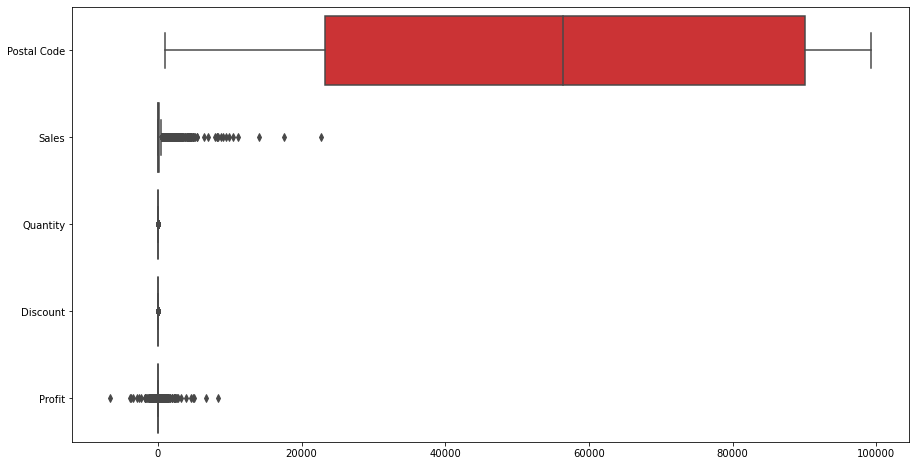

In [71]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,palette="Set1",orient= "h")

<Figure size 1080x576 with 0 Axes>

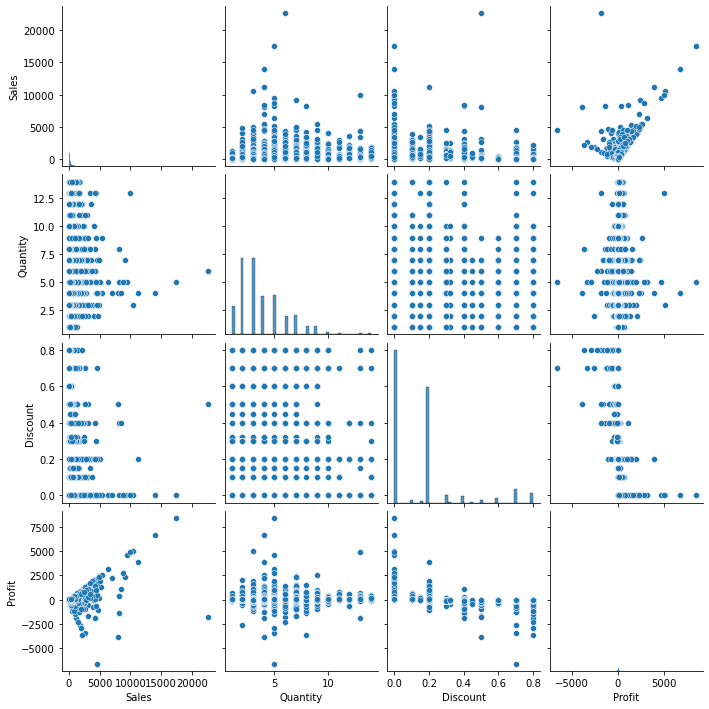

In [72]:

plt.figure(figsize=(15,8))
sns.pairplot(sample1)

<AxesSubplot:>

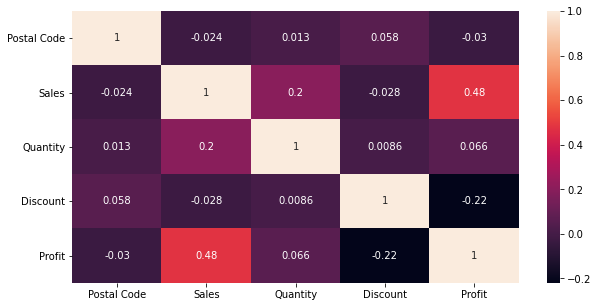

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

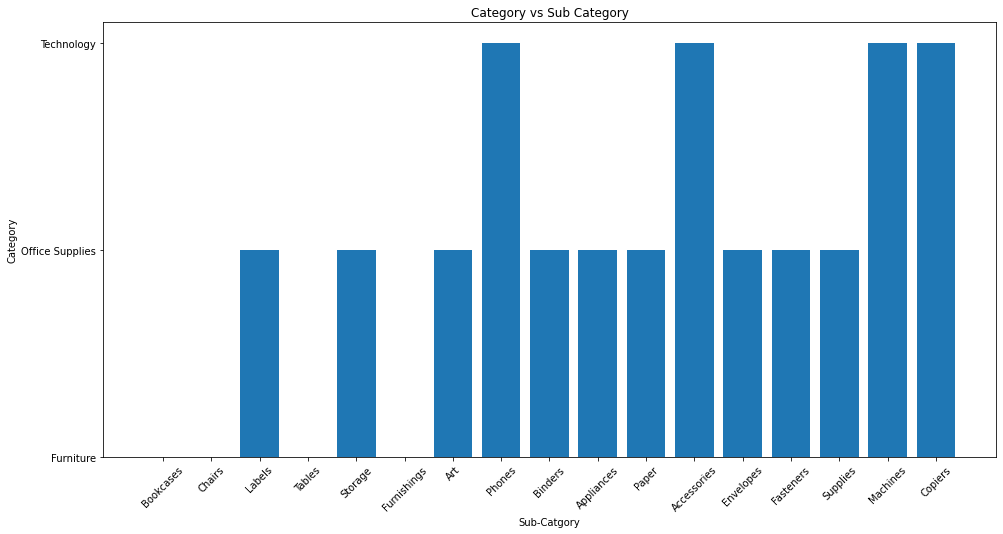

In [74]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=sample1)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

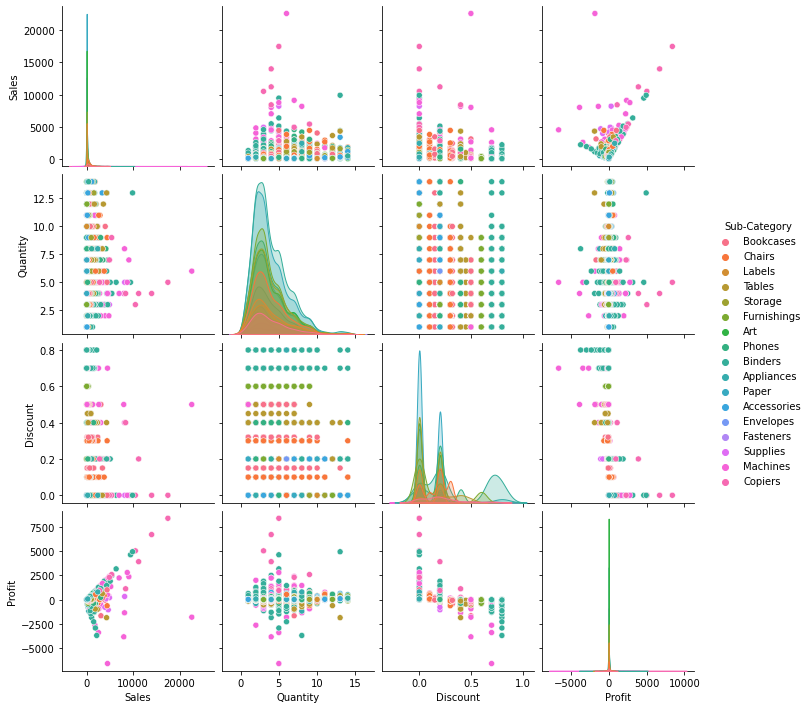

In [75]:
figsize=(15,10)
sns.pairplot(sample1,hue='Sub-Category')
plt.show

By looking at above histogram plot we can say that Data is clearly not normally distributed 

In [76]:
sample1['State'].value_counts() #Checking for count of states 

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

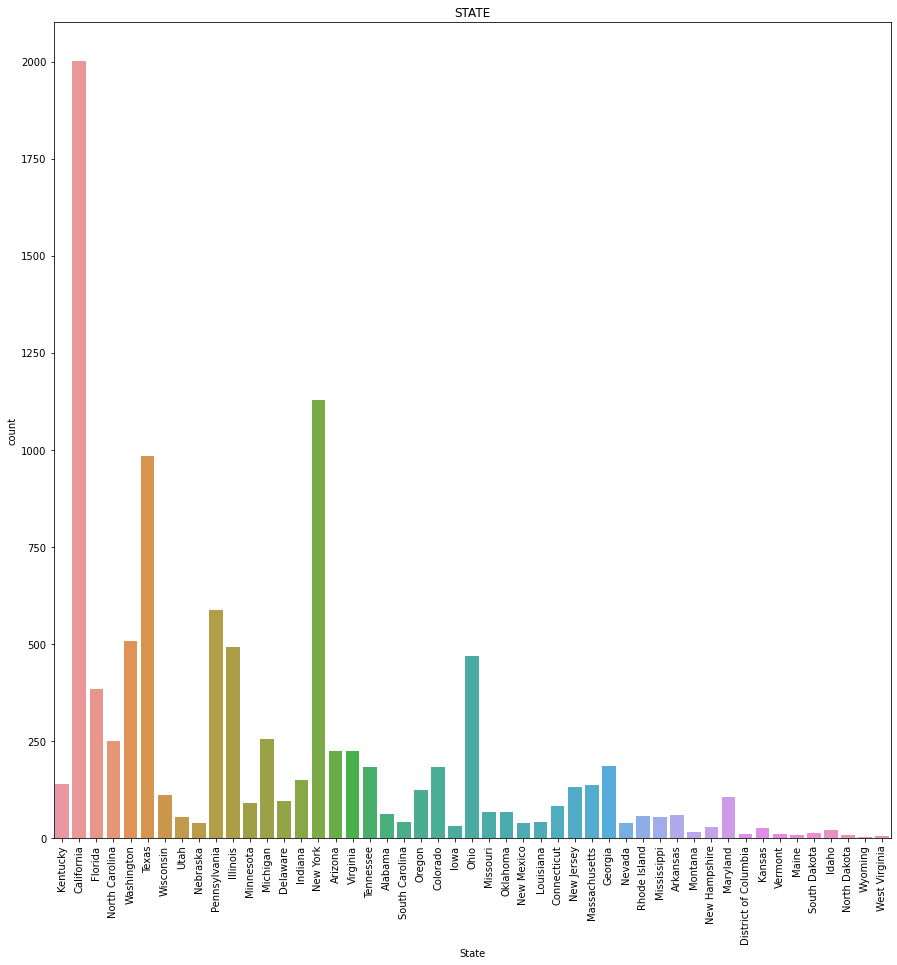

In [77]:
plt.figure(figsize=(15,15))
sns.countplot(x=sample1['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()                                     #Plotting the states and their respective counts graphically

C:\Users\KuruvadaDivya\Anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors
C:\Users\KuruvadaDivya\Anaconda3\lib\site-packages\mizani\palettes.py:397: UserWarning: Warning message:Brewer palette Spectral has a maximum of 11 colors Returning the palette you asked for with that many colors


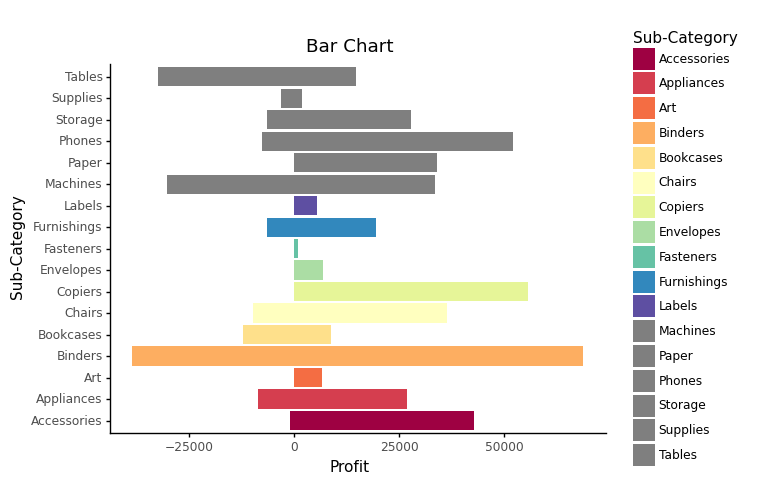

<ggplot: (126564941828)>

In [78]:
Profit_plot = (ggplot(sample1, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Bar Chart'))

display(Profit_plot)

The bar chart above shows the profit wrt to each subcategory given in the data set. By looking at above, below are the observations we can make:
1) Binders incurred most losses and made most profits in comparision to any other sub-category(this might be due to more discounts given..)

2)Copiers are not incurring losses and has been quite profitable..

3)There are also other sub-categories like fasteners,envelopes,art,labels which didn't incur any loss but are also not very profitable...

4)Accessories and phones are also moderatly profitable

5) Tables is incurring more losses

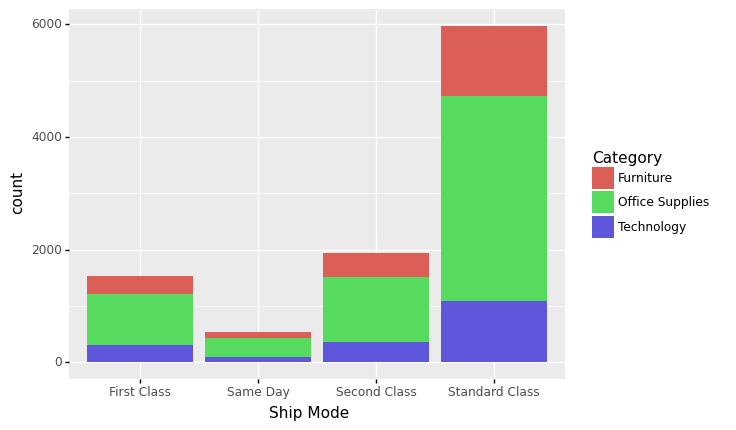

<ggplot: (126564961811)>

In [79]:
ggplot(sample1, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

Standard Class is the most preffered mode of shipment with respect to all the categories

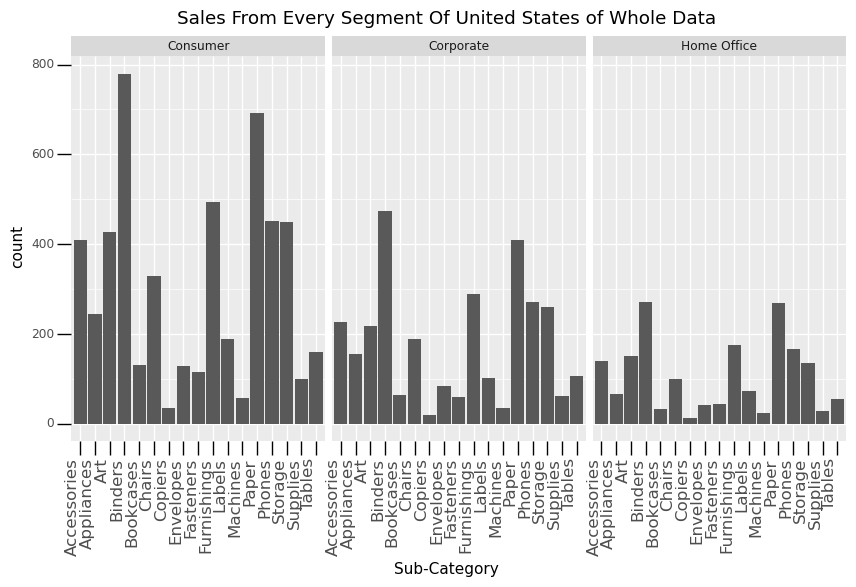

<ggplot: (126563616781)>

In [80]:
#SALES FROM ALL THE SEGMENTS OF THE USA:

flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),
                     axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(sample1, aes(x='Sub-Category', fill='Sales')) + geom_bar() + facet_wrap(['Segment']) 
+ flip_xlabels +theme(axis_text_x = element_text(size=12))+ggtitle("Sales From Every Segment Of United States of Whole Data"))

From this graph, we can say that the "Home Office" segment has the least purchased sub-categories and Consumers has most purchased sub-categories where "Tables", "Supplies", "Machines", "Copiers", "Bookcases" have the minimum sales

Binders has the maximum sales in all of the three segments

Although Copiers has minimum sales its always making profits


In [81]:
#SALES REGION WISE OF THE USA:

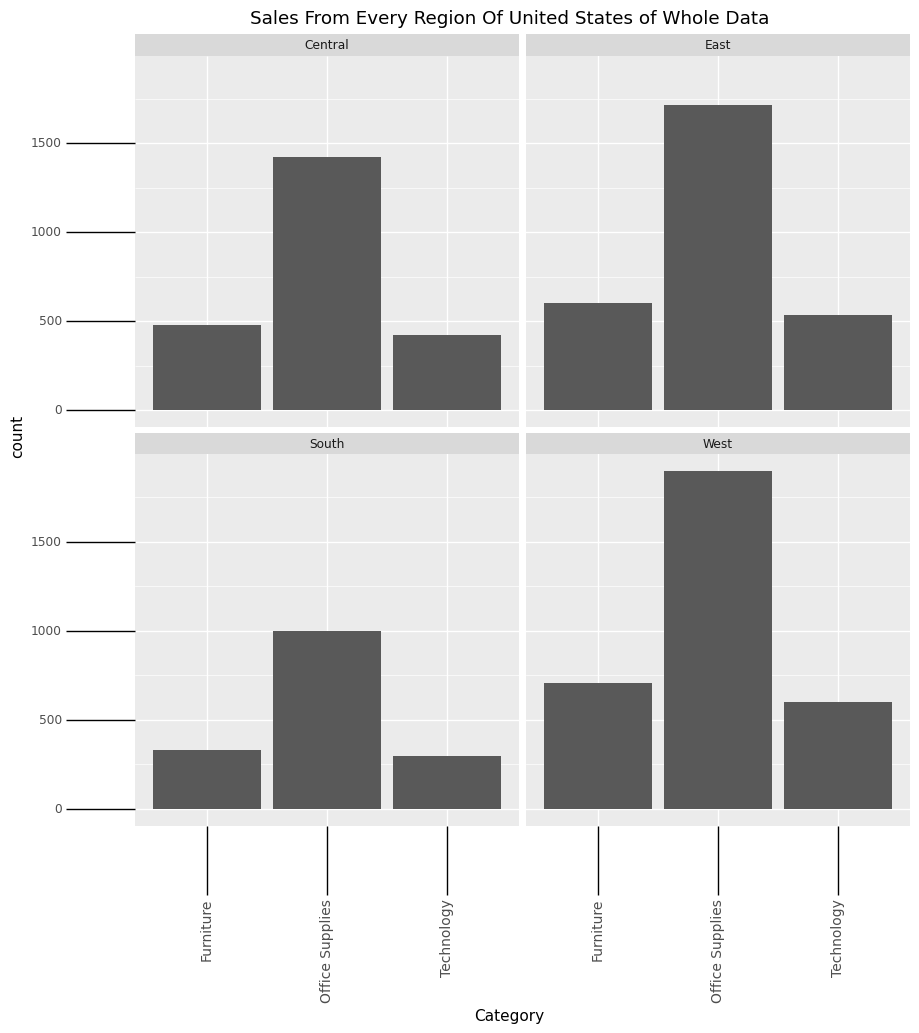

<ggplot: (126564877761)>

In [82]:
flip_xlabels = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(10,10),
                     axis_ticks_length_major=50,axis_ticks_length_minor=50)
(ggplot(sample1, aes(x='Category', fill='Sales')) + geom_bar() + theme(axis_text_x = element_text(size=10)) 
+ facet_wrap(['Region']) + flip_xlabels+ ggtitle("Sales From Every Region Of United States of Whole Data"))

C:\Users\KuruvadaDivya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


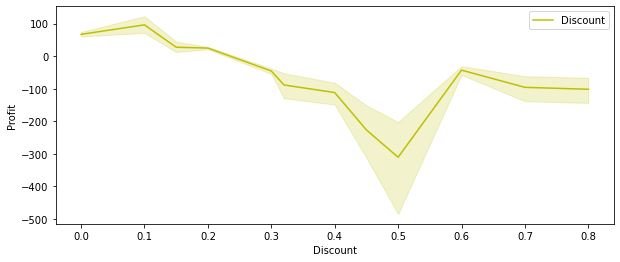

In [83]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=sample1 , color='y',label='Discount')
plt.legend()
plt.show()

In [84]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = sample1.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

<ipython-input-84-761578c706a7>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-84-761578c706a7>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-84-761578c706a7>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-84-761578c706a7>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-84-761578c706a7>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
<ipython-input-84-761578c706a7>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which

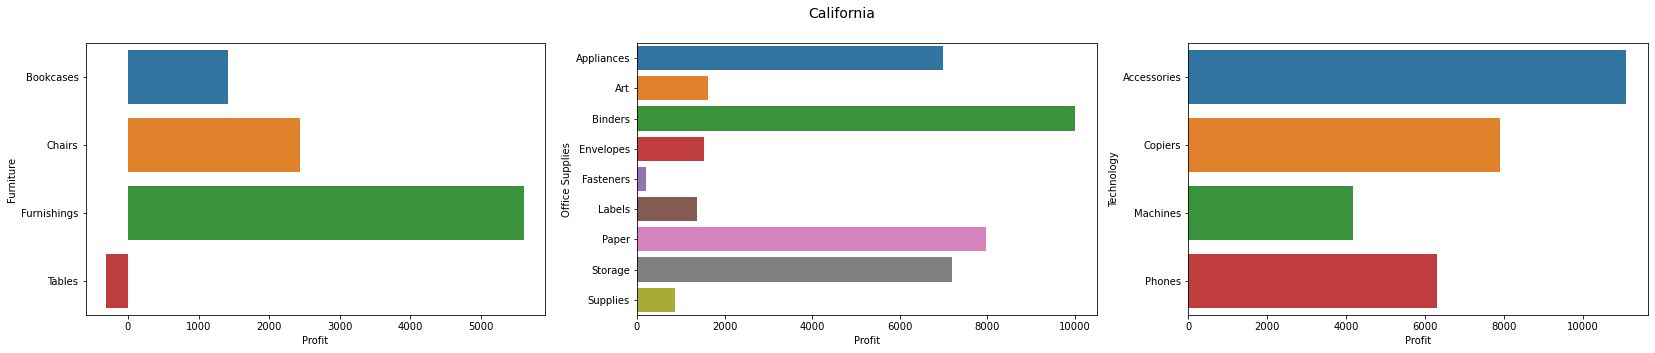

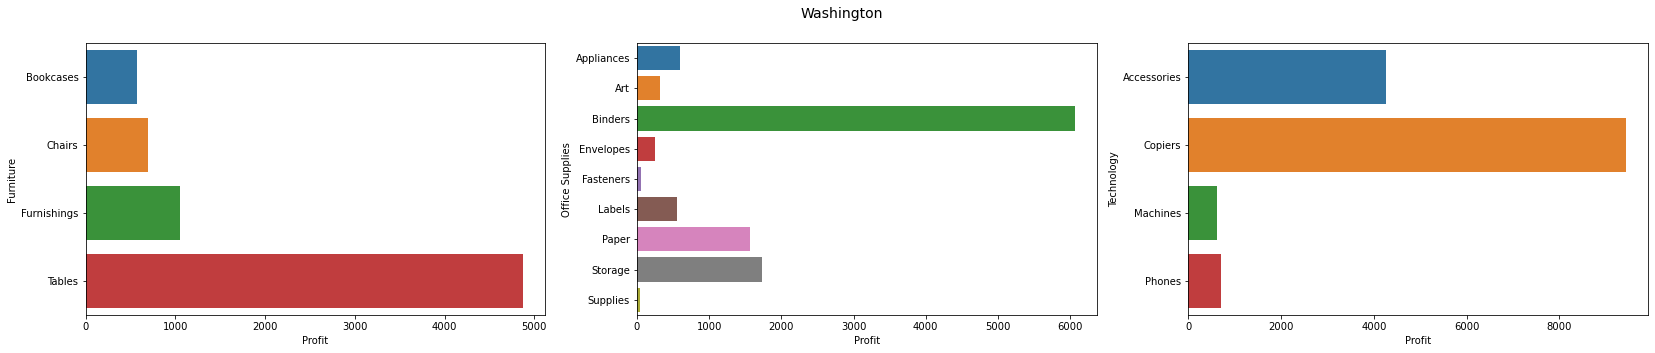

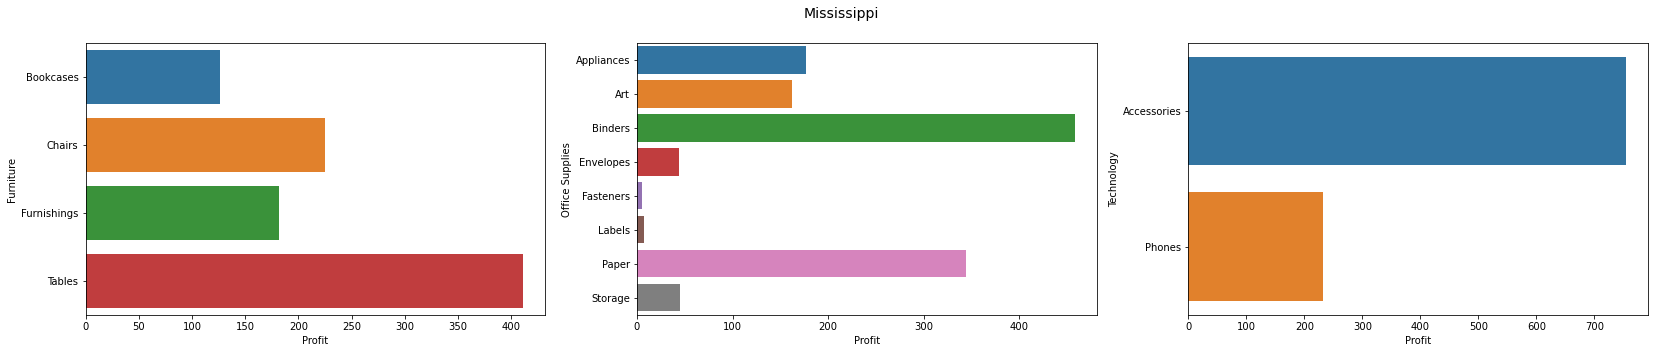

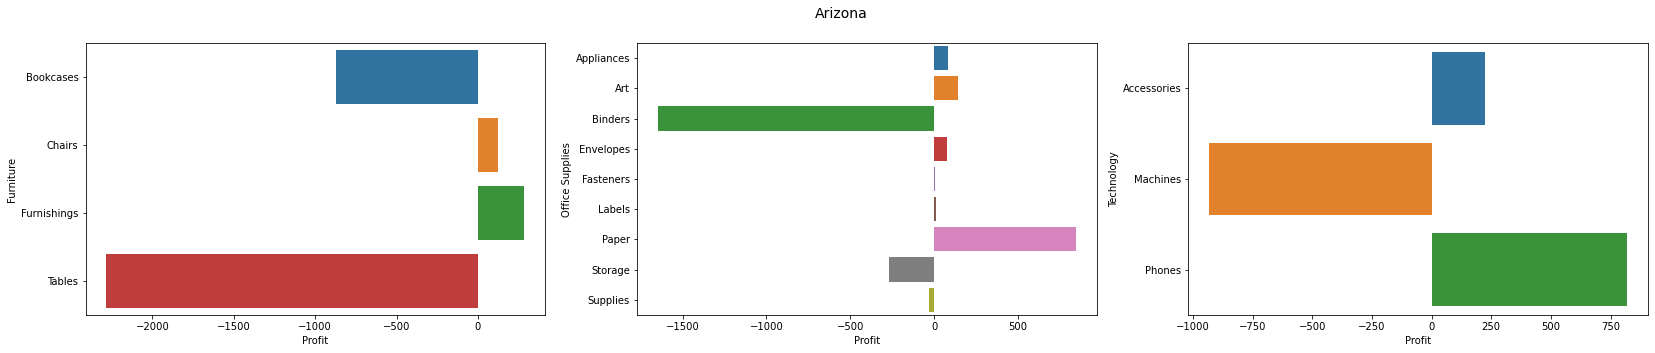

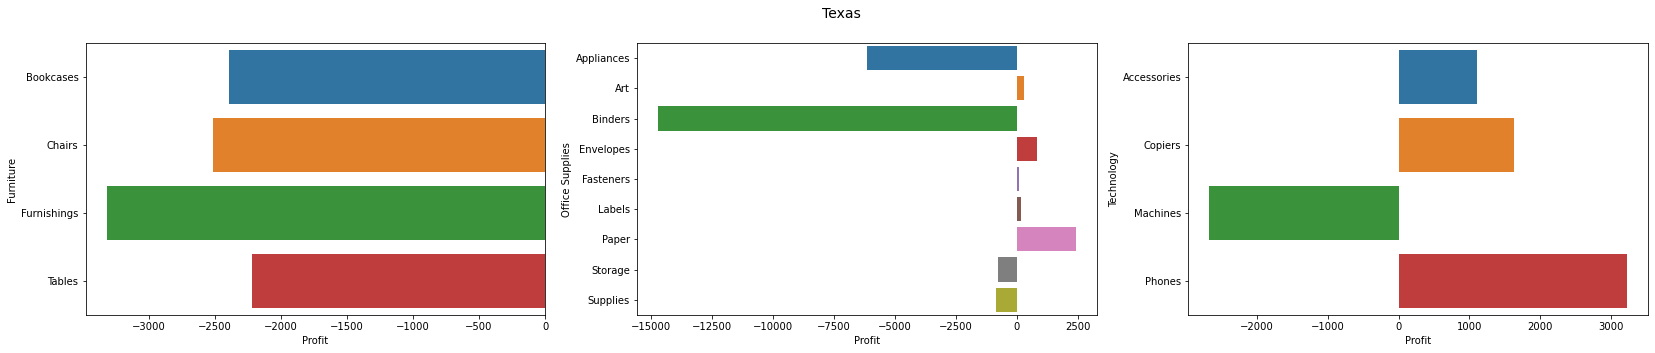

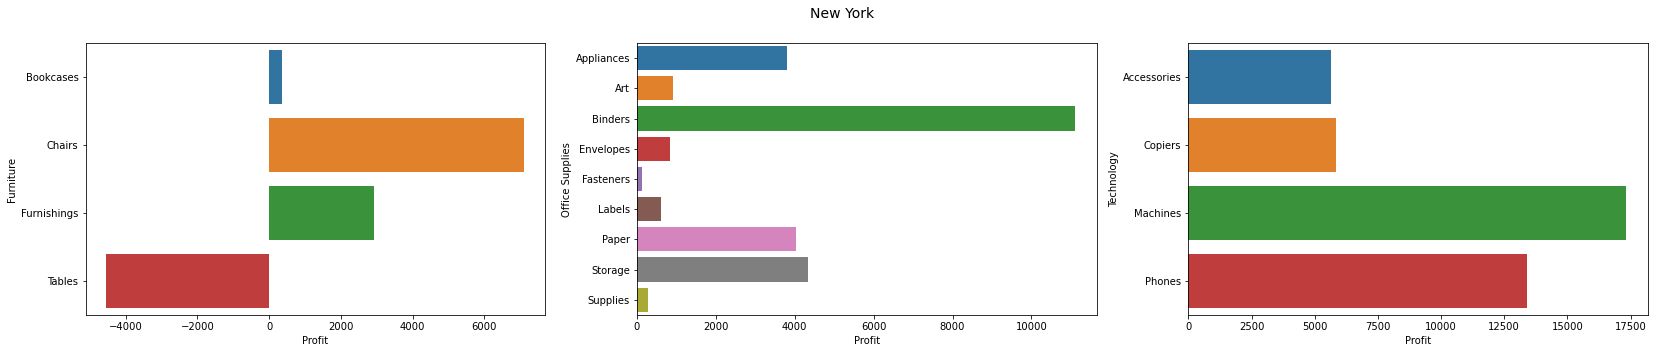

In [85]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas','New York']
state_data_viewer(states)

OBSERVATIONS AND SUGGESTIONS # Conclusion

From the data visualization above, 

We can see the states and category where sales and profit are high or low. We can improve in these states by offering discounts in the preferred range so that both the business and the consumer benefit.

-In East and West Region profit is adequate so supply can be enhanced there..

-Copiers makes most profit out of all subcategories...so supply and sales can be improved..

-For furniture and Technology category supplies... "Same day" shipment mode can be avoided as it's least preffered

-Cities like California and Newyork are making excellent profits in Technology category are..

Discounts: Here, as the supermarket suffers losses by offering discounts on its products, it can't stop doing it. Most of the big discounts take place during festivals, season ends and sales which are necessary for the store to make room in its warehouses for fresh stock. In addition, by incurring small losses, the company wins in the future by attracting more long-term customers. Therefore, small losses of discounts are an essential part of business operations. 


